In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt
import statsmodels.api as sm
import os


### read dataset

In [2]:
kc_df = pd.read_csv("/kaggle/input/housesalesprediction/kc_house_data.csv")
kc_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Exploratory Data Analysis¶


In [3]:
kc_df.shape

(21613, 21)

In [4]:
kc_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
kc_df.drop(['id', 'lat','long','date','zipcode'], axis=1,inplace=True)


In [6]:
kc_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [7]:
kc_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248


<AxesSubplot:>

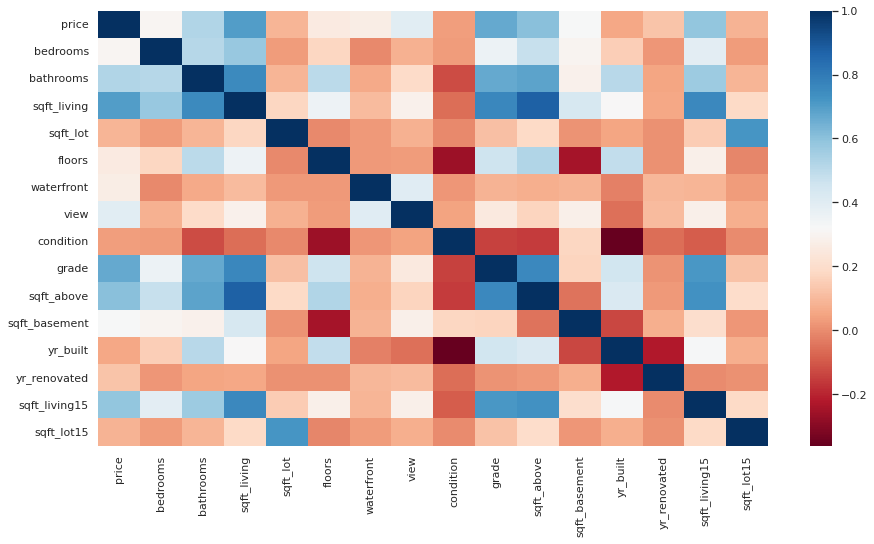

In [8]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(kc_df.corr(),cmap='RdBu')

<AxesSubplot:xlabel='price', ylabel='Count'>

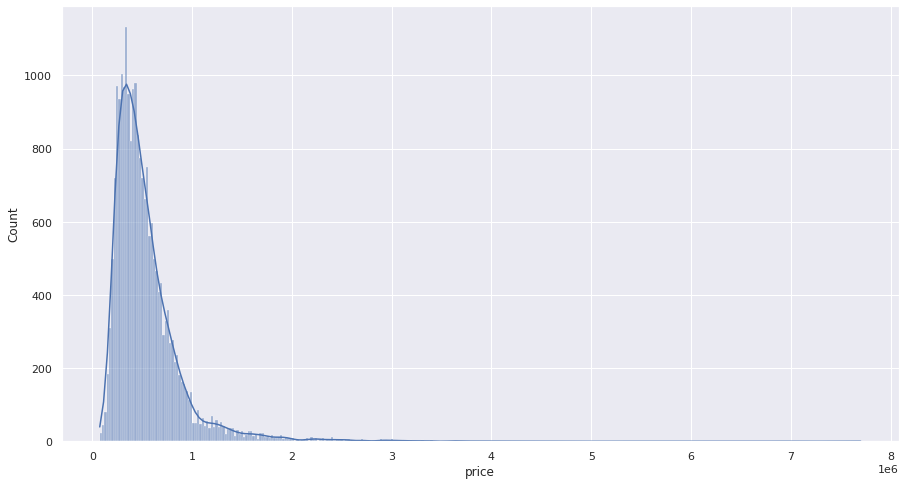

In [9]:
sns.histplot(data=kc_df, x="price",kde=True)


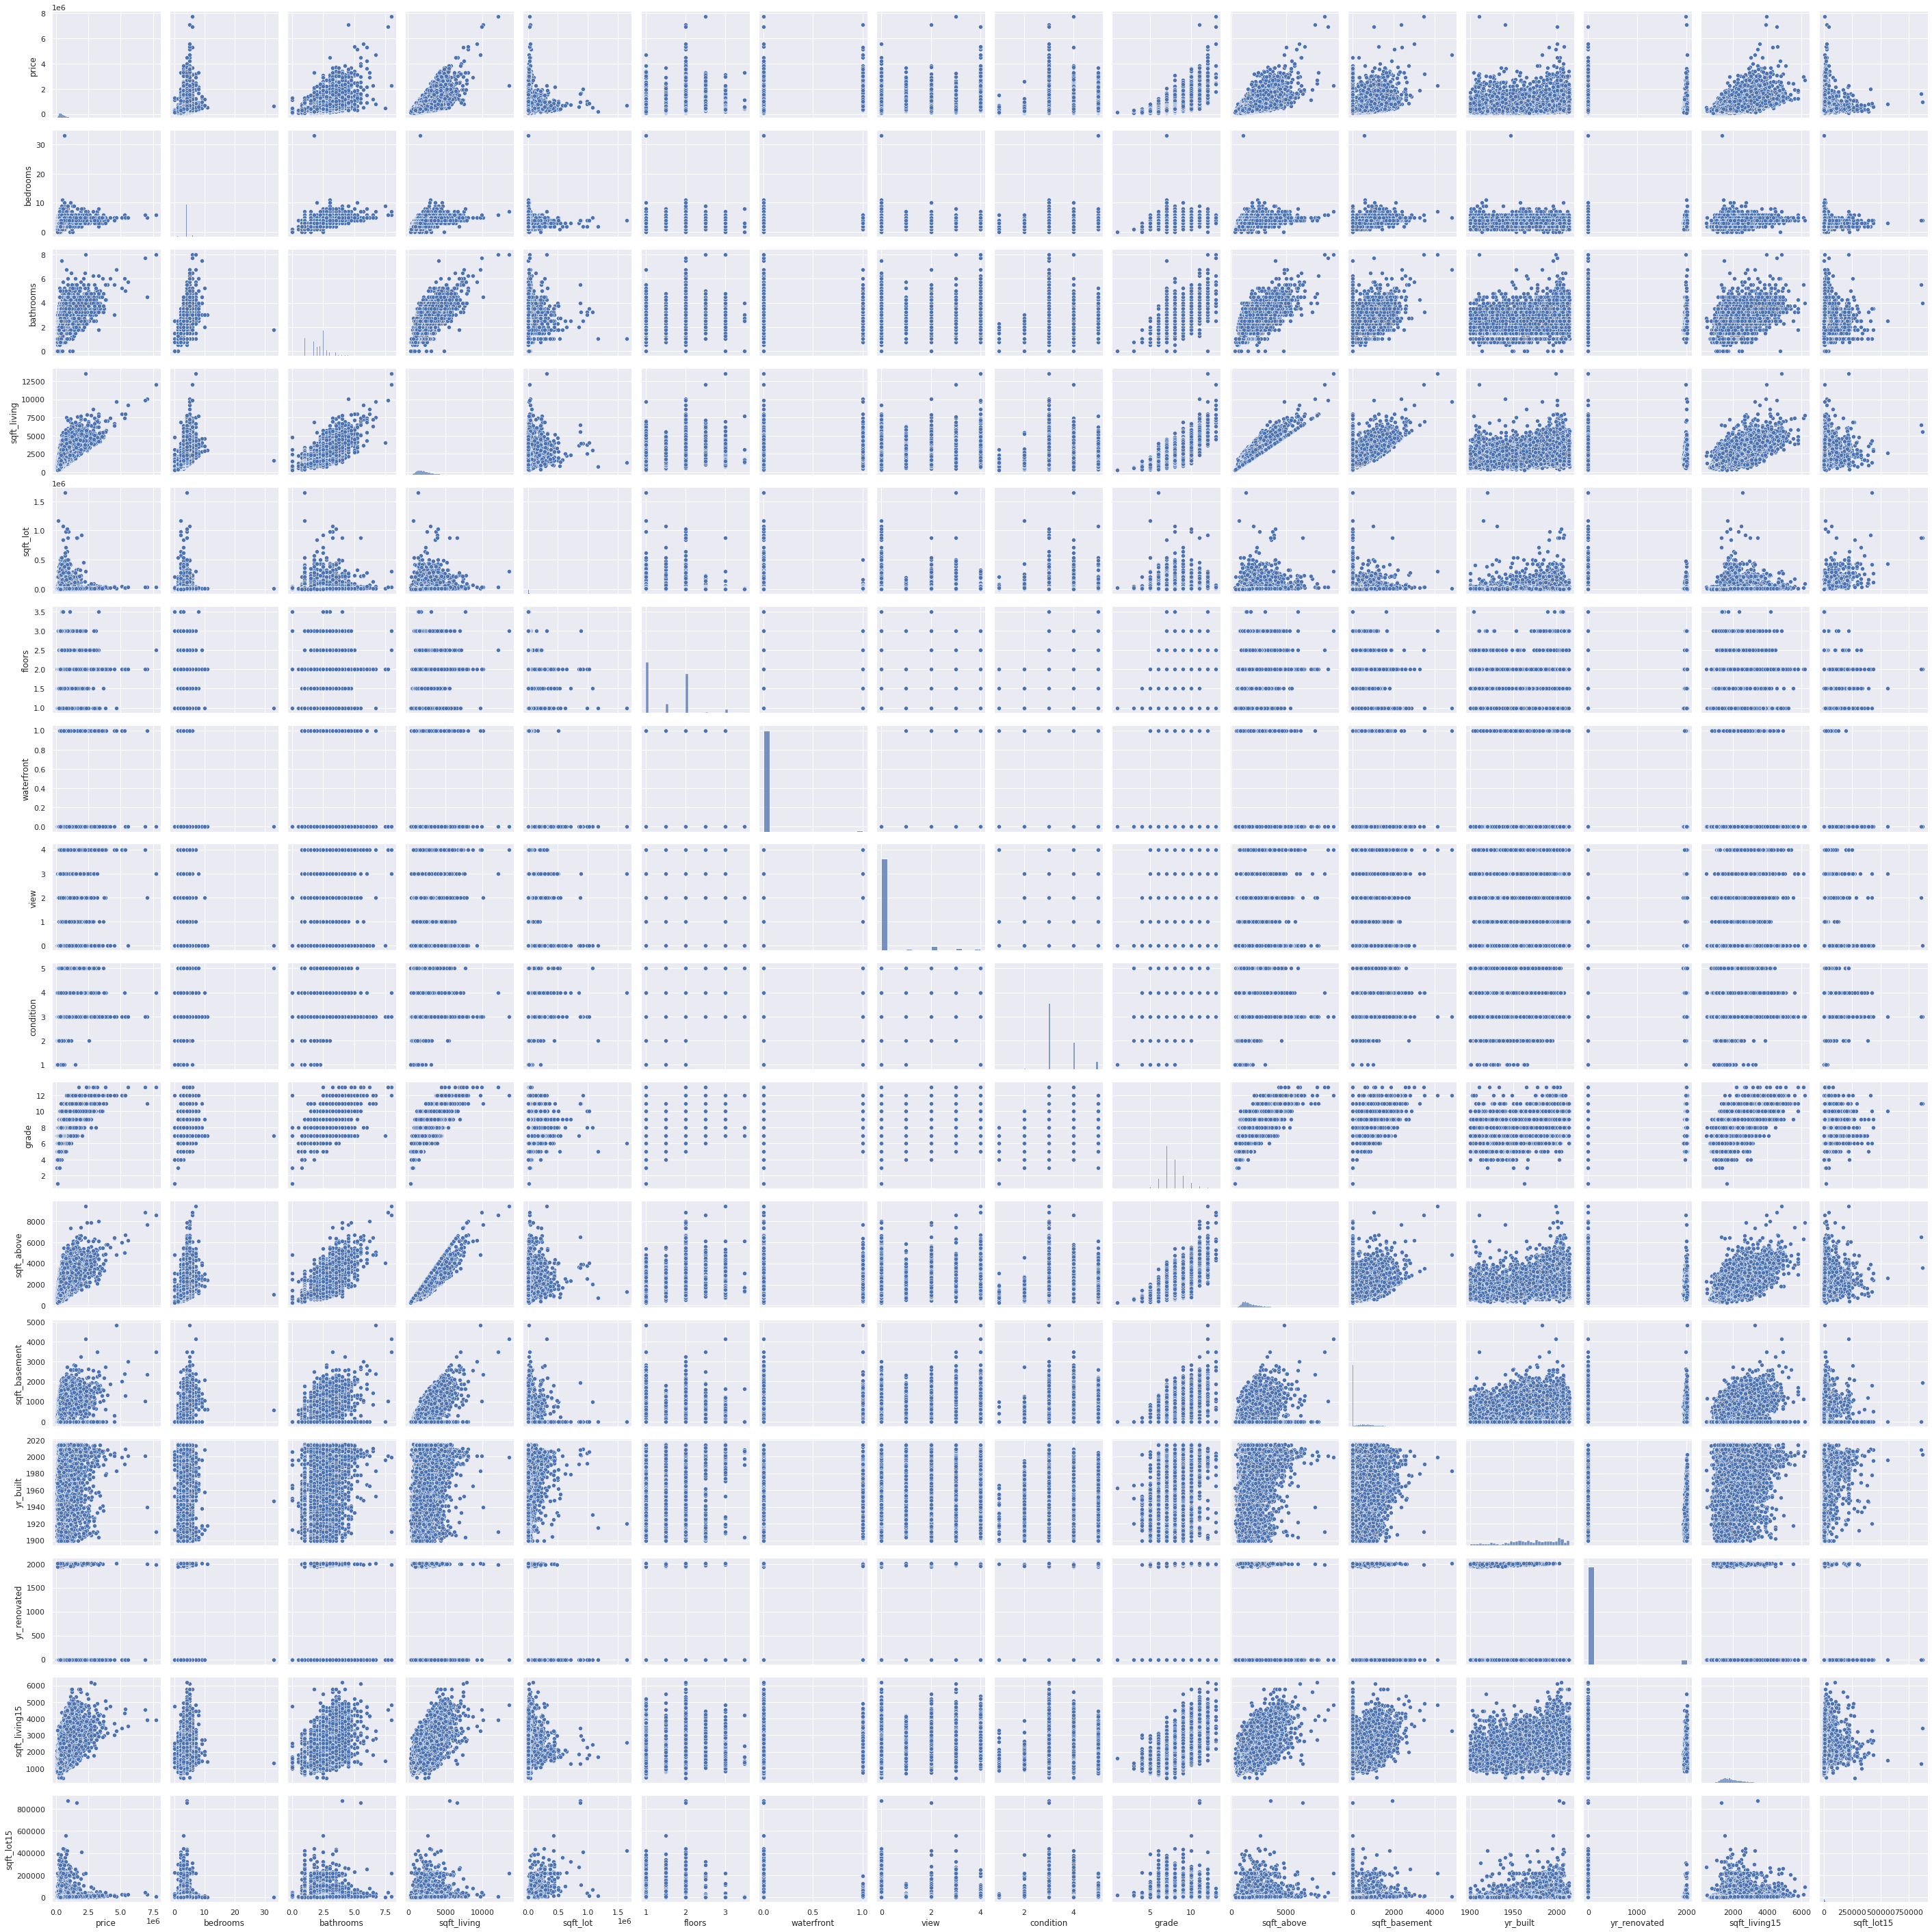

In [10]:
sns.pairplot(kc_df)

In [11]:
kc_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

# statistics with scipy.stats

In [12]:
x=kc_df[['bedrooms','bathrooms','floors','view','sqft_living']]
y=kc_df[['price']]

In [13]:
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     5178.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        07:58:21   Log-Likelihood:            -2.9909e+05
No. Observations:               21613   AIC:                         5.982e+05
Df Residuals:                   21607   BIC:                         5.982e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.483e+04   7379.623      8.785      0.000    5.04e+04    7.93e+04
bedrooms    -4.715e+04   2268.623    -20.783      0.000   -5.16e+04   -4.27e+04
bathrooms    6887.9308   3663.733      1.880      0.060    -293.257    1.41e+04
floors       1.257e+04   3638.096      3.456      0.001    5443.380    1.97e+04
view         9.857e+04   2314.785     42.585      0.000     9.4e+04    1.03e+05
sqft_living   277.7725      3.057     90.876      0.000     271.781     283.764
==============================================================================
Omnibus:                    14034.551   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           522353.355
Skew:                           2.591   Prob(JB):                         0.00
Kurtosis:                      26.520   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# prediction with sklearn

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm=LinearRegression()
lm

LinearRegression()

In [16]:
lm.fit(x,y)

LinearRegression()

In [17]:
lm.coef_


array([[     0.        , -47148.45555845,   6887.93082647,
         12574.31675367,  98574.83337169,    277.77250534]])

In [18]:
YHAT=lm.predict(x)

# Regression Model Evaluation

In [19]:
y_data = kc_df['price']
x_data=kc_df.drop('price',axis=1)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 4323
number of training samples: 17290


In [21]:
x_train,y_train

(       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
 7291          3       1.75         2190      7021     1.0           0     2   
 14835         3       2.50         2370      6840     2.0           0     0   
 15880         2       1.00         1230      3800     1.0           0     0   
 8812          4       2.25         2510      9963     1.0           0     0   
 17220         3       1.00         1160      7491     1.0           0     0   
 ...         ...        ...          ...       ...     ...         ...   ...   
 10955         3       2.50         1920      3867     2.0           0     0   
 17289         4       4.50         3420      7440     3.0           0     0   
 5192          3       1.75         1970     54450     1.0           0     0   
 12172         3       2.25         1980      8775     1.0           0     0   
 235           5       4.00         3760     28040     2.0           0     0   
 
        condition  grade  sqft_above  

In [22]:
lre=LinearRegression()

In [23]:
lre.fit(x_train, y_train)

LinearRegression()

In [24]:
y_predict= lre.predict(x_test)
y_predict

array([ 727297.68410977,  312986.54189445,  853519.48368193, ...,
        463062.87675236, 1381599.57246012,  276748.07161185])

In [25]:
y_test,y_predict

(15544     459000.0
 17454     445000.0
 21548    1057000.0
 3427      732350.0
 8809      235000.0
            ...    
 13597     965000.0
 9648      359950.0
 18627     260000.0
 9553     1795000.0
 14200     418000.0
 Name: price, Length: 4323, dtype: float64,
 array([ 727297.68410977,  312986.54189445,  853519.48368193, ...,
         463062.87675236, 1381599.57246012,  276748.07161185]))

In [26]:
lre.score(x_test, y_test)

0.6534026568638704

In [27]:
lre.score(x_train, y_train)

0.652998425393551

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.6534026568638704